# NMF

In [1]:
import pandas as pd
import os
import csv

# Identify the working directory and data files
working_directory = './26-NMF'

# Create the working directory if needed
try:
    os.makedirs(working_directory, exist_ok=True)
except OSError as error:
    print(f"Error creating {working_directory}: {error}")

In [2]:
! pip install --quiet --upgrade nltk

In [3]:
! python -m nltk.downloader --quiet 'all'

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


In [4]:
# Read the preprocessed data into a dataframe
import pickle

with open('./21-data_preprocessing/dataframe.pickle', 'rb') as f:
    df = pickle.load(f)

In [5]:
df.shape

(5736, 20)

In [6]:
df.head(4)

,ROW_ID,FOI_TEXT,DEVICE_PROBLEM_CODE,DEVICE_PROBLEM_TEXT,GENERIC_NAME,DEVICE_REPORT_PRODUCT_CODE,UDI-DI,UDI-PUBLIC,DATE_OF_EVENT,REPORTER_OCCUPATION_CODE,REPORT_DATE,EVENT_LOCATION,SOURCE_TYPE,TOKENIZED_TEXT,NOPUNCT_TEXT,NOSTOPWORDS_TEXT,NODIGITS_TEXT,POS_TEXT,LEMMATIZED_TEXT,STEMMED_TEXT
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,,,07/30/2020,000,,I,CONSUMER,"[it, was, reported, that, the, transmitter, lo...","[it, was, reported, that, the, transmitter, lo...","[reported, transmitter, lost, connection, pump...","[reported, transmitter, lost, connection, pump...","[(reported, VBN), (transmitter, NN), (lost, VB...","[report, transmitter, lose, connection, pump, ...","[report, transmitt, lost, connect, pump, great..."
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,06/05/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, produ...","[report, signal, loss, one, hour, occur, produ..."
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,1435,No Device Output,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/05/2020,000,,I,CONSUMER,"[it, was, reported, that, transmitter, failed,...","[it, was, reported, that, transmitter, failed,...","[reported, transmitter, failed, error, occurre...","[reported, transmitter, failed, error, occurre...","[(reported, VBN), (transmitter, NN), (failed, ...","[report, transmitter, fail, error, occur, data...","[report, transmitt, fail, error, occur, data, ..."
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,3283,Wireless Communication Problem,CONTINUOUS GLUCOSE MONITOR,QBJ,00386270000385,00386270000385,10/23/2020,000,,I,CONSUMER,"[it, was, reported, that, signal, loss, over, ...","[it, was, reported, that, signal, loss, over, ...","[reported, signal, loss, one, hour, occurred, ...","[reported, signal, loss, one, hour, occurred, ...","[(reported, VBN), (signal, JJ), (loss, NN), (o...","[report, signal, loss, one, hour, occur, revie...","[report, signal, loss, one, hour, occur, revie..."


In [7]:
bag_of_words_file = "./21-data_preprocessing/bag_of_words_data.csv"

# Read the data into a pandas dataframe
bow_df = pd.read_csv(bag_of_words_file, # The data file being read, from the variable assignment above
                 on_bad_lines='warn',           # This tells Pandas to only warn on bad lines vs causing an error
                 dtype='str')                   # This tells Pandas to treat all numbers as words

bow_df.fillna("", inplace=True)

In [8]:
bow_df.shape

(5736, 922)

In [9]:
bow_df.head(4)

,abbott,abdomen,abdominal,aberration,able,accessory,accuracy,accurate,acetaminophen,actually,...,work,would,x2,xray,year,yellow,yes,yet,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# The number of topics you want to extract
num_topics = 15 

max_topics = 15

In [11]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=num_topics, init='nndsvda')
nmf_model.fit(bow_df)
doc_topic_matrix = nmf_model.transform(bow_df)
topic_word_matrix = nmf_model.components_
num_top_words = 10 # or the number of top words you want to display for each topic

In [12]:
doc_topic_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00495679, 0.27847656,
        0.        ],
       [0.172487  , 0.0020364 , 0.        , ..., 0.        , 0.01604984,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.28440367,
        0.        ],
       [0.172487  , 0.0020364 , 0.        , ..., 0.        , 0.01604984,
        0.        ],
       [0.        , 0.        , 0.06591635, ..., 0.00646944, 0.21501894,
        0.        ]])

In [13]:
topic_word_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.37650885e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.76789944e-04, 0.00000000e+00, 2.36693264e-05, ...,
        0.00000000e+00, 5.84940511e-04, 0.00000000e+00],
       [0.00000000e+00, 1.33603559e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [14]:
terms = bow_df.columns
len(terms)

922

In [15]:
num_top_words = 10 # or the number of top words you want to display for each topic
for topic_idx, topic in enumerate(topic_word_matrix):
    print("\nTopic #%d:" % topic_idx)
    print(" ".join([terms[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))


Topic #0:
report data confirm evaluate probable determine injury intervention medical allegation

Topic #1:
read bg mgdl cgm meter glucose reportedly customer inaccuracy monitor

Topic #2:
within share log report investigation review find window perform confirm

Topic #3:
transmitter fail error report battery low occur allegation medical intervention

Topic #4:
new evaluation submit return product become information available relevant supplemental

Topic #5:
perform pass inspection visual test voltage product evaluate external pair

Topic #6:
glucose report value data parkes grid fall within zone error

Topic #7:
transmitter customer could root replacement send determine additional information available

Topic #8:
device receive however report yet expect submit return supplemental evaluation

Topic #9:
sensor report expiration early patient alert replace insert b6 occur

Topic #10:
transmitter connection pump patient additional information report available lose event

Topic #11:
signa

In [16]:
%pip install --upgrade --quiet gensim

Note: you may need to restart the kernel to use updated packages.


In [17]:
texts = [word for row in df['LEMMATIZED_TEXT'] for word in row]

In [18]:
from gensim import corpora

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = corpora.Dictionary([texts])

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

In [19]:
bow_corpus = [dictionary.doc2bow(row, allow_update=True) for row in df['LEMMATIZED_TEXT']]

In [20]:
from gensim.models import Nmf

nmf = Nmf(bow_corpus, num_topics=num_topics)

In [21]:
vocab = set()
for tok in texts:
    vocab.add(tok)

- Parameters

        corpus (iterable of list of (int, float) or csc_matrix with the shape (n_tokens, n_documents)) – Training corpus. Can be either iterable of documents, which are lists of (word_id, word_count), or a sparse csc matrix of BOWs for each document. If not specified, the model is left uninitialized (presumably, to be trained later with self.train()).

        texts (list of list of str, optional) – Tokenized texts, needed for coherence models that use sliding window based (i.e. coherence=`c_something`) probability estimator .

        dictionary ({dict of (int, str), gensim.corpora.dictionary.Dictionary}, optional) – Dictionary mapping of id word to create corpus. If model.id2word is present, this is not needed. If both are provided, passed dictionary will be used.

        window_size (int, optional) – Is the size of the window to be used for coherence measures using boolean sliding window as their probability estimator. For ‘u_mass’ this doesn’t matter. If None - the default window sizes are used which are: ‘c_v’ - 110, ‘c_uci’ - 10, ‘c_npmi’ - 10.

        coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional) – Coherence measure to be used. Fastest method - ‘u_mass’, ‘c_uci’ also known as c_pmi. For ‘u_mass’ corpus should be provided, if texts is provided, it will be converted to corpus using the dictionary. For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided (corpus isn’t needed)

        topn (int, optional) – Integer corresponding to the number of top words to be extracted from each topic.

        processes (int, optional) – Number of processes to use for probability estimation phase, any value less than 1 will be interpreted as num_cpus - 1.


- Returns
Each element in the list is a pair of a topic representation and its coherence score. Topic representations are distributions of words, represented as a list of pairs of word IDs and their probabilities.

- Return type
list of (list of (int, str), float)

In [22]:
# Each element in the list returned is a pair of a topic representation and its coherence score. 
# Topic representations are distributions of words, represented as a list of pairs of word IDs and their probabilities.

umass_top_topics = nmf.top_topics(corpus=bow_corpus, texts=texts, dictionary=dictionary, window_size=None, coherence='u_mass', topn=num_top_words)

In [25]:
# Each element in the list returned is a pair of a topic representation and its coherence score. 
# Topic representations are distributions of words, represented as a list of pairs of word IDs and their probabilities.

# cv_top_topics = nmf.top_topics(corpus=bow_corpus, texts=texts, dictionary=dictionary, window_size=None, coherence='c_v', topn=num_top_words)

In [28]:
num_top_words = 10 # or the number of top words you want to display for each topic

coherence_score = []

for topic_index, topic in enumerate(topic_word_matrix):
    print(f"Topic #{topic_index}:")
    print(f"\tScore('u_mass'): {umass_top_topics[topic_index][1]}")
    #print(f"\tScore('c_v)   : {cv_top_topics[topic_index][1]}")
    print("\tWords          : " + " ".join([terms[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
    coherence_score.append(umass_top_topics[topic_index][1])

Topic #0:
	Score('u_mass'): -0.15173815012552547
	Words          : report data confirm evaluate probable determine injury intervention medical allegation
Topic #1:
	Score('u_mass'): -0.26741434106728845
	Words          : read bg mgdl cgm meter glucose reportedly customer inaccuracy monitor
Topic #2:
	Score('u_mass'): -0.43716287768738965
	Words          : within share log report investigation review find window perform confirm
Topic #3:
	Score('u_mass'): -0.5172070151713916
	Words          : transmitter fail error report battery low occur allegation medical intervention
Topic #4:
	Score('u_mass'): -0.5715312404614014
	Words          : new evaluation submit return product become information available relevant supplemental
Topic #5:
	Score('u_mass'): -0.6266868732326675
	Words          : perform pass inspection visual test voltage product evaluate external pair
Topic #6:
	Score('u_mass'): -0.6725510369597131
	Words          : glucose report value data parkes grid fall within zone error
T

In [29]:
coherence_score

[-0.15173815012552547,
 -0.26741434106728845,
 -0.43716287768738965,
 -0.5172070151713916,
 -0.5715312404614014,
 -0.6266868732326675,
 -0.6725510369597131,
 -1.0068971074627096,
 -1.137061717563952,
 -1.5028258270645662,
 -1.6367038572675834,
 -1.691996299562977,
 -1.7728831648621566,
 -5.125700701695066,
 -6.843271006601391]

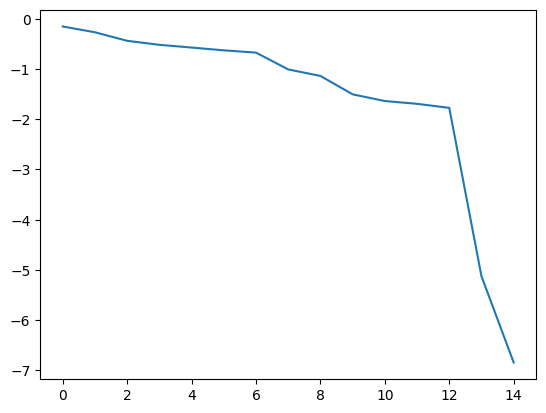

In [30]:
import matplotlib.pyplot as plt
plt.plot(coherence_score)
plt.show()